# K均值算法（K-means）聚类

## 【关键词】K个种子，均值

## 一、K-means算法原理

### 聚类的概念：一种无监督的学习，事先不知道类别，自动将相似的对象归到同一个簇中。

K-Means算法是一种聚类分析（cluster analysis）的算法，其主要是来计算数据聚集的算法，主要通过不断地取离种子点最近均值的算法。

K-Means算法主要解决的问题如下图所示。我们可以看到，在图的左边有一些点，我们用肉眼可以看出来有四个点群，但是我们怎么通过计算机程序找出这几个点群来呢？于是就出现了我们的K-Means算法

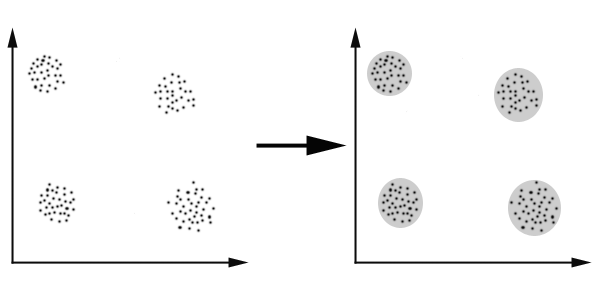

这个算法其实很简单，如下图所示：

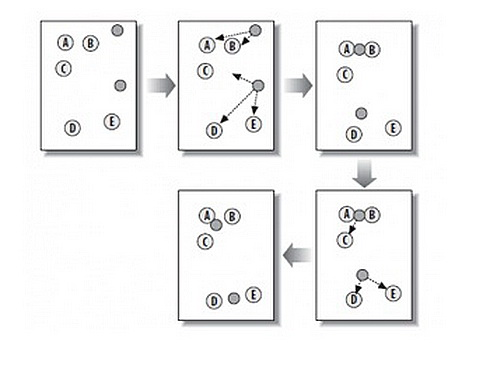

从上图中，我们可以看到，A，B，C，D，E是五个在图中点。而灰色的点是我们的种子点，也就是我们用来找点群的点。有两个种子点，所以K=2。

然后，K-Means的算法如下：

1. 随机在图中取K（这里K=2）个种子点。
2. 然后对图中的所有点求到这K个种子点的距离，假如点Pi离种子点Si最近，那么Pi属于Si点群。（上图中，我们可以看到A，B属于上面的种子点，C，D，E属于下面中部的种子点）
3. 接下来，我们要移动种子点到属于他的“点群”的中心。（见图上的第三步）
4. 然后重复第2）和第3）步，直到，种子点没有移动（我们可以看到图中的第四步上面的种子点聚合了A，B，C，下面的种子点聚合了D，E）。

这个算法很简单，重点说一下“求点群中心的算法”：欧氏距离（Euclidean Distance）：差的平方和的平方根

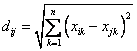


### K-Means主要最重大的缺陷——都和初始值有关：

K是事先给定的，这个K值的选定是非常难以估计的。很多时候，事先并不知道给定的数据集应该分成多少个类别才最合适。（ISODATA算法通过类的自动合并和分裂，得到较为合理的类型数目K）

K-Means算法需要用初始随机种子点来搞，这个随机种子点太重要，不同的随机种子点会有得到完全不同的结果。（K-Means++算法可以用来解决这个问题，其可以有效地选择初始点）

### 总结：K-Means算法步骤：

1. 从数据中选择k个对象作为初始聚类中心;
2. 计算每个聚类对象到聚类中心的距离来划分；
3. 再次计算每个聚类中心
4. 计算标准测度函数，直到达到最大迭代次数，则停止，否则，继续操作。
5. 确定最优的聚类中心

### K-Means算法应用

看到这里，你会说，K-Means算法看来很简单，而且好像就是在玩坐标点，没什么真实用处。而且，这个算法缺陷很多，还不如人工呢。是的，前面的例子只是玩二维坐标点，的确没什么意思。但是你想一下下面的几个问题：

1）如果不是二维的，是多维的，如5维的，那么，就只能用计算机来计算了。

2）二维坐标点的X，Y 坐标，其实是一种向量，是一种数学抽象。现实世界中很多属性是可以抽象成向量的，比如，我们的年龄，我们的喜好，我们的商品，等等，能抽象成向量的目的就是可以让计算机知道某两个属性间的距离。如：我们认为，18岁的人离24岁的人的距离要比离12岁的距离要近，鞋子这个商品离衣服这个商品的距离要比电脑要近，等等。

## 二、实战

重要参数：
- n_clusters：聚类的个数

重要属性：
- cluster_centers_ : [n_clusters, n_features]的数组，表示聚类中心点的坐标
- labels_ : 每个样本点的标签


### 1、聚类实例

导包，使用make_blobs生成随机点cluster_std

In [3]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
samples,target = make_blobs(n_samples=100,n_features=2,centers=2)

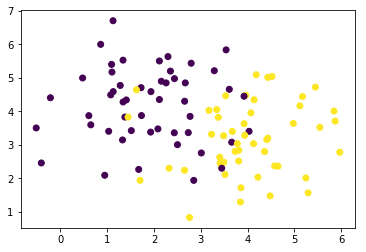

In [4]:
plt.scatter(samples[:,0],samples[:,1],c=target)

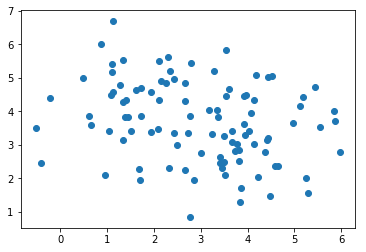

In [5]:
plt.scatter(samples[:,0],samples[:,1])

In [6]:
samples

array([[ 4.07056607,  3.95453899],
       [ 3.66038623,  3.07671558],
       [ 2.50114787,  3.00291894],
       [ 1.07465486,  4.49088906],
       [ 2.6684851 ,  4.84950895],
       [ 3.9642746 ,  4.48274005],
       [ 1.27796526,  4.77418243],
       [ 0.47429343,  4.99704938],
       [-0.21374922,  4.4056005 ],
       [ 4.43146706,  3.19895302],
       [ 3.85791323,  1.71481943],
       [ 4.0316019 ,  3.40243954],
       [ 4.97740878,  3.63794063],
       [ 3.54053047,  5.83741466],
       [ 1.12460848,  6.70946401],
       [ 5.24538257,  2.00791294],
       [ 0.60764698,  3.87049769],
       [ 4.18370158,  5.09466313],
       [ 1.73223088,  3.87338783],
       [ 5.44890548,  4.72380868],
       [ 3.49250944,  2.47972054],
       [ 3.80865948,  2.51250902],
       [ 2.75926312,  0.82669824],
       [ 3.41249902,  2.44897962],
       [ 3.22871604,  3.31421245],
       [ 2.08374351,  3.47443941],
       [ 1.10201409,  5.17342854],
       [ 2.35099453,  5.20197199],
       [ 4.22099457,

建立模型,训练数据，并进行数据预测，使用相同数据

In [13]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=2)

kmean.fit(samples)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [14]:
y_ = kmean.predict(samples)

绘制图形，显示聚类结果kmeans.cluster_centers

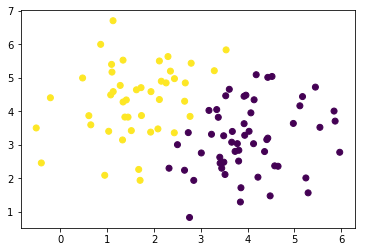

In [15]:
plt.scatter(samples[:,0],samples[:,1],c=y_)

In [17]:
centers = kmean.cluster_centers_

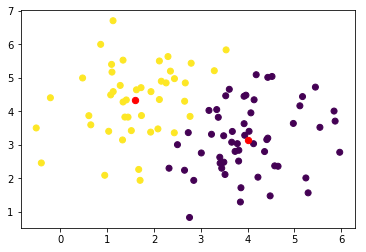

In [18]:
plt.scatter(samples[:,0],samples[:,1],c=y_)
plt.scatter(centers[:,0],centers[:,1],c='red',s=40)

In [ ]:
# 聚类 无监督学习
# 分类 有监督学习
# K-mean - KNN
# 欧式距离求距离

### 实战，三问中国足球几多愁？

导包，3D图像需导包：

from mpl_toolkits.mplot3d import Axes3D

读取数据AsiaZoo.txt

In [24]:
import pandas as pd
from pandas import Series,DataFrame

data = pd.read_csv('../data/AsiaZoo.txt',header=None)
data.columns=["国家","2006世界杯","2010世界杯","2007亚洲杯"]
data

,国家,2006世界杯,2010世界杯,2007亚洲杯
0,中国,50,50,9
1,日本,28,9,4
2,韩国,17,15,3
3,伊朗,25,40,5
4,沙特,28,40,2
5,伊拉克,50,50,1
6,卡塔尔,50,40,9
7,阿联酋,50,40,9
8,乌兹别克斯坦,40,40,5
9,泰国,50,50,9


In [25]:
samples = data[["2006世界杯","2010世界杯","2007亚洲杯"]]
samples

,2006世界杯,2010世界杯,2007亚洲杯
0,50,50,9
1,28,9,4
2,17,15,3
3,25,40,5
4,28,40,2
5,50,50,1
6,50,40,9
7,50,40,9
8,40,40,5
9,50,50,9


In [27]:
kmean = KMeans(n_clusters=3)
# kmean.fit(samples)
# kmean.predict(samples)
y_ = kmean.fit_predict(samples)

In [28]:
y_

array([0, 1, 1, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0])

列名修改为："国家","2006世界杯","2010世界杯","2007亚洲杯"

使用K-Means进行数据处理，对亚洲球队进行分组，分三组

for循环打印输出分组后的球队，每一组球队打印一行

In [29]:
countrys = data['国家']
countrys

0         中国
1         日本
2         韩国
3         伊朗
4         沙特
5        伊拉克
6        卡塔尔
7        阿联酋
8     乌兹别克斯坦
9         泰国
10        越南
11        阿曼
12        巴林
13        朝鲜
14        印尼
Name: 国家, dtype: object

In [35]:
for i in range(3):
    items = countrys[y_ == i]
    for item in items:
        print(item,end=' ')
    print('\n')

中国 伊拉克 卡塔尔 阿联酋 泰国 越南 阿曼 印尼 

日本 韩国 

伊朗 沙特 乌兹别克斯坦 巴林 朝鲜 



绘制三维立体图形

- ax = plt.subplot(projection  = '3d')  
- ax.scatter3D()

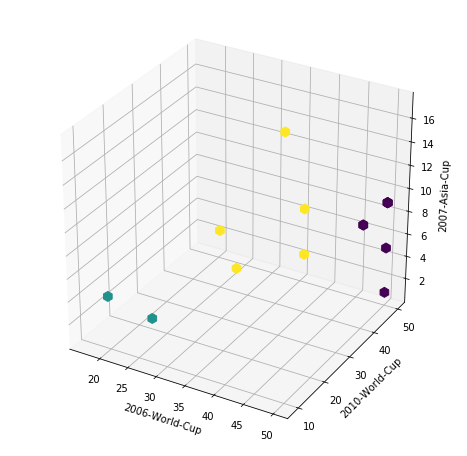

In [51]:
from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize=(8,8))
ax = plt.subplot(projection='3d')

ax.scatter3D(samples['2006世界杯'],samples['2010世界杯'],samples['2007亚洲杯'],alpha=1,s=100,marker='h',c=y_)
ax.set_xlabel("2006-World-Cup")
ax.set_ylabel("2010-World-Cup")
ax.set_zlabel("2007-Asia-Cup")

centers = kmean.cluster_centers_
# ax.scatter3D(centers[:,0],centers[:,1],centers[:,2],c='red',s=150,alpha=1)

绘制聚类点

### 2、聚类实践与常见错误

导包，使用make_blobs创建样本点

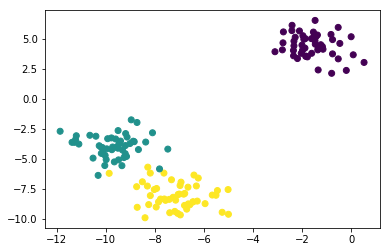

In [55]:
samples,target = make_blobs(n_samples=150,n_features=2,centers=3,random_state=1)
plt.scatter(samples[:,0],samples[:,1],c=target)

第一种错误，k值不合适，make_blobs默认中心点三个

In [60]:
kmean = KMeans(n_clusters=4)
y_ = kmean.fit_predict(samples)

Text(0.5,1,'Predict')

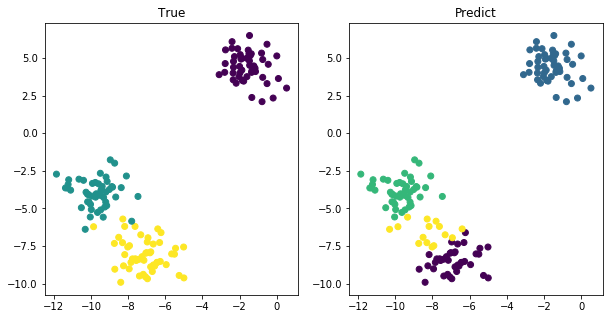

In [61]:
plt.figure(figsize=(10,5))
axes1 = plt.subplot(1,2,1)
axes1.scatter(samples[:,0],samples[:,1],c=target)
axes1.set_title('True')

axes2 = plt.subplot(1,2,2)
axes2.scatter(samples[:,0],samples[:,1],c=y_)
axes2.set_title('Predict')

In [57]:
# kmean.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1])

第二种错误,数据偏差  
trans = [[0.6,-0.6],[-0.4,0.8]]  
X2 = np.dot(X,trans)

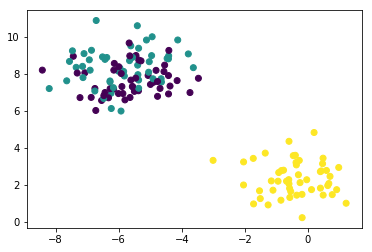

In [65]:
samples1,target1 = make_blobs(n_samples=150,n_features=2,centers=3,random_state=5)
plt.scatter(samples1[:,0],samples1[:,1],c=target1)

In [67]:
import numpy as np

trans = [[0.6,-0.6],[-0.4,0.8]]
samples = np.dot(samples1,trans)

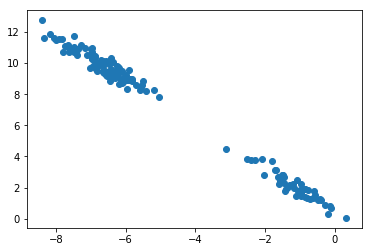

In [70]:
plt.scatter(samples[:,0],samples[:,1])

Text(0.5,1,'True')

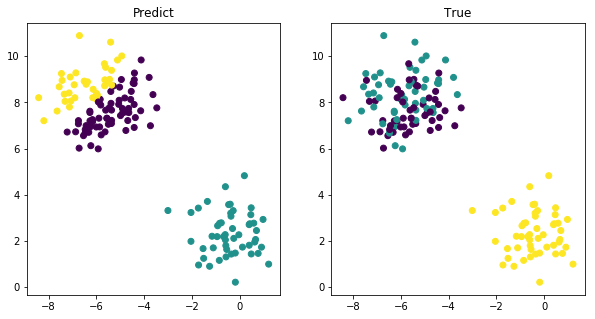

In [76]:
kmean = KMeans(n_clusters=3)
y_ = kmean.fit_predict(samples)

plt.figure(figsize=(10,5))
axes1 = plt.subplot(1,2,1)
axes1.scatter(samples1[:,0],samples1[:,1],c=y_)
axes1.set_title('Predict')

axes2 = plt.subplot(1,2,2)
axes2.scatter(samples1[:,0],samples1[:,1],c=target1)
axes2.set_title('True')

第三个错误:标准偏差不相同cluster_std

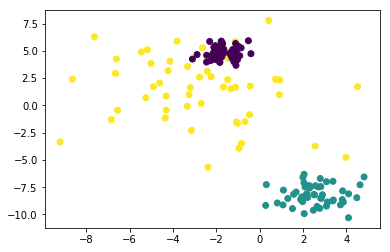

In [77]:
samples,target = make_blobs(n_samples=150,n_features=2,centers=3,cluster_std=[0.5,1,3])
plt.scatter(samples[:,0],samples[:,1],c=target)

In [78]:
kmean = KMeans(n_clusters=3)
y_ = kmean.fit_predict(samples)

Text(0.5,1,'Predict')

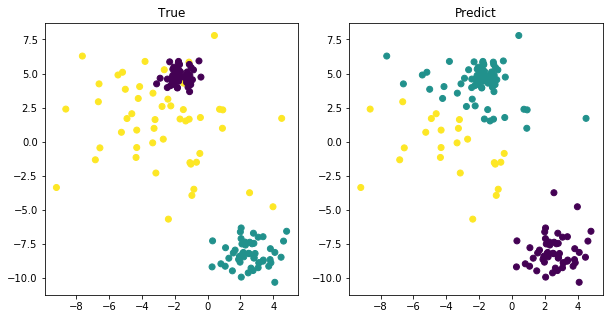

In [79]:
plt.figure(figsize=(10,5))
axes1 = plt.subplot(1,2,1)
axes1.scatter(samples[:,0],samples[:,1],c=target)
axes1.set_title('True')

axes2 = plt.subplot(1,2,2)
axes2.scatter(samples[:,0],samples[:,1],c=y_)
axes2.set_title('Predict')

第四个错误：样本数量不同

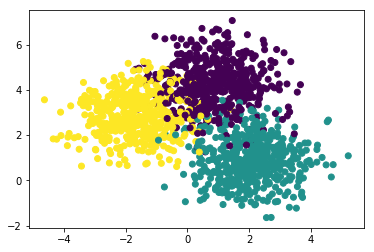

In [96]:
samples,target = make_blobs(n_samples=1500,n_features=2,centers=3,random_state=0)
plt.scatter(samples[:,0],samples[:,1],c=target)

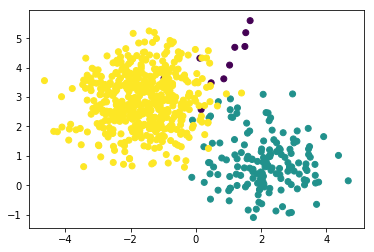

In [97]:
train1 = samples[target==0][:10]
train2 = samples[target==1][:150]
train3 = samples[target==2][:500]

train = np.concatenate((train1,train2,train3))
label = [0]*10 + [1]*150 + [2]*500

plt.scatter(train[:,0],train[:,1],c=label)

In [98]:
kmean = KMeans(n_clusters=3)
y_ = kmean.fit_predict(train)

Text(0.5,1,'Predict')

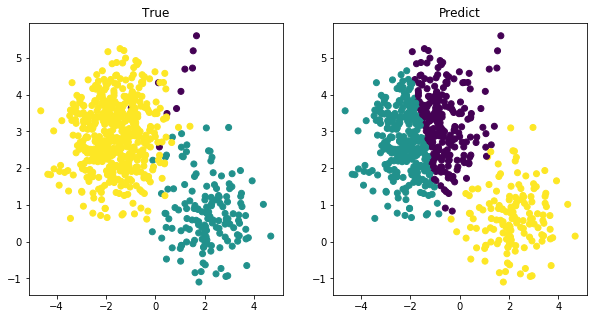

In [99]:
plt.figure(figsize=(10,5))
axes1 = plt.subplot(1,2,1)
axes1.scatter(train[:,0],train[:,1],c=label)
axes1.set_title('True')

axes2 = plt.subplot(1,2,2)
axes2.scatter(train[:,0],train[:,1],c=y_)
axes2.set_title('Predict')

## 三、作业

### 1、分析ex7data2.mat文件

找出最佳聚类数目，并画出聚类的中心点

`
from scipy.io import loadmat
from sklearn.cluster import KMeans
data = loadmat('../data/ex7data2.mat')
X = data['X']
X.shape
`

In [127]:
from scipy.io import loadmat

data = loadmat('../data/ex7data2.mat')['X']

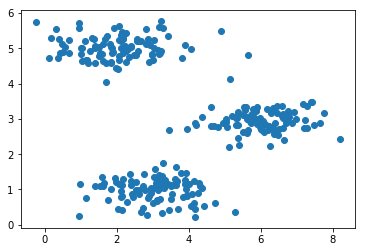

In [128]:
plt.scatter(data[:,0],data[:,1])

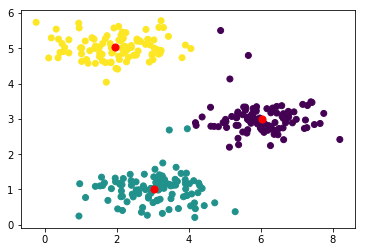

In [132]:
kmean = KMeans(n_clusters=3)
y_ = kmean.fit_predict(data)

plt.scatter(data[:,0],data[:,1],c=y_)
centers = kmean.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='red',s=50)

### 2、图片压缩

使用聚类压缩图片

`
img = plt.imread('../data/bird_small.png')
img_shape = img.shape
img_shape
`

- 核心思想：把图片颜色数据聚类分析成N个类别，用中心点颜色替换其他颜色

In [102]:
girl = plt.imread('meizi.jpg')

In [117]:
data = girl.reshape(-1,3)/255.0

In [118]:
data

array([[0.75294118, 0.77254902, 0.78431373],
       [0.75686275, 0.77647059, 0.78823529],
       [0.76078431, 0.78039216, 0.79215686],
       ...,
       [0.49411765, 0.45882353, 0.43921569],
       [0.49411765, 0.45882353, 0.43921569],
       [0.49019608, 0.45490196, 0.43529412]])

In [119]:
kmean = KMeans(n_clusters=5)

kmean.fit_predict(data)

array([1, 4, 4, ..., 3, 3, 3])

In [120]:
colors = kmean.cluster_centers_

In [121]:
colors

array([[0.97098806, 0.97478961, 0.97778226],
       [0.74193731, 0.67788276, 0.65664508],
       [0.28508069, 0.2517683 , 0.30811107],
       [0.57589379, 0.50164084, 0.49412421],
       [0.8664354 , 0.86114772, 0.86019593]])

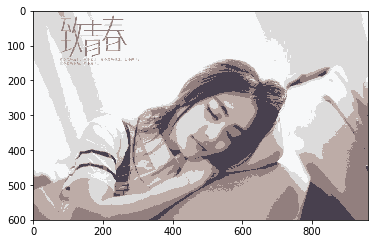

In [122]:
plt.imshow(colors[kmean.labels_].reshape(girl.shape))